## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9831350	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9630760	total: 59.4ms	remaining: 29.7s
2:	learn: 0.9444045	total: 60.4ms	remaining: 20.1s
3:	learn: 0.9270757	total: 61.4ms	remaining: 15.3s
4:	learn: 0.9109749	total: 62.4ms	remaining: 12.4s
5:	learn: 0.8964149	total: 63.3ms	remaining: 10.5s
6:	learn: 0.8786969	total: 64.3ms	remaining: 9.12s
7:	learn: 0.8617588	total: 65.4ms	remaining: 8.11s
8:	learn: 0.8458159	total: 66.1ms	remaining: 7.28s
9:	learn: 0.8287198	total: 66.9ms	remaining: 6.63s
10:	learn: 0.8138423	total: 67.8ms	remaining: 6.1s
11:	learn: 0.7982699	total: 68.6ms	remaining: 5.65s
12:	learn: 0.7833736	total: 69.4ms	remaining: 5.27s
13:	learn: 0.7682159	total: 70.1ms	remaining: 4.94s
14:	learn: 0.7546022	total: 70.9ms	remaining: 4.66s
15:	learn: 0.7403394	total: 71.8ms	remaining: 4.42s
16:	learn: 0.7272481	total: 72.6ms	remaining: 4.2s
17:	learn: 0.7146104	total: 73.4ms	remaining: 4s
18:	learn: 0.7023758	total: 74.3ms	remaining: 3.8

59:	learn: 0.4184574	total: 108ms	remaining: 1.7s
60:	learn: 0.4140287	total: 109ms	remaining: 1.68s
61:	learn: 0.4105371	total: 110ms	remaining: 1.67s
62:	learn: 0.4072688	total: 111ms	remaining: 1.65s
63:	learn: 0.4040479	total: 112ms	remaining: 1.63s
64:	learn: 0.4007007	total: 113ms	remaining: 1.62s
65:	learn: 0.3979308	total: 113ms	remaining: 1.6s
66:	learn: 0.3947735	total: 114ms	remaining: 1.59s
67:	learn: 0.3909468	total: 115ms	remaining: 1.58s
68:	learn: 0.3873709	total: 116ms	remaining: 1.56s
69:	learn: 0.3845789	total: 117ms	remaining: 1.55s
70:	learn: 0.3814406	total: 118ms	remaining: 1.54s
71:	learn: 0.3788909	total: 119ms	remaining: 1.53s
72:	learn: 0.3766075	total: 120ms	remaining: 1.52s
73:	learn: 0.3733997	total: 121ms	remaining: 1.51s
74:	learn: 0.3713459	total: 122ms	remaining: 1.5s
75:	learn: 0.3688234	total: 123ms	remaining: 1.49s
76:	learn: 0.3662351	total: 124ms	remaining: 1.48s
77:	learn: 0.3632930	total: 124ms	remaining: 1.47s
78:	learn: 0.3609816	total: 125ms	

157:	learn: 0.2543276	total: 192ms	remaining: 1.02s
158:	learn: 0.2537708	total: 193ms	remaining: 1.02s
159:	learn: 0.2535538	total: 193ms	remaining: 1.01s
160:	learn: 0.2525101	total: 195ms	remaining: 1.01s
161:	learn: 0.2518956	total: 195ms	remaining: 1.01s
162:	learn: 0.2509886	total: 196ms	remaining: 1.01s
163:	learn: 0.2502615	total: 197ms	remaining: 1s
164:	learn: 0.2492168	total: 198ms	remaining: 1s
165:	learn: 0.2485876	total: 199ms	remaining: 999ms
166:	learn: 0.2476698	total: 200ms	remaining: 997ms
167:	learn: 0.2470499	total: 201ms	remaining: 994ms
168:	learn: 0.2464648	total: 202ms	remaining: 991ms
169:	learn: 0.2457759	total: 202ms	remaining: 988ms
170:	learn: 0.2448462	total: 203ms	remaining: 984ms
171:	learn: 0.2443661	total: 204ms	remaining: 981ms
172:	learn: 0.2437908	total: 205ms	remaining: 979ms
173:	learn: 0.2432453	total: 206ms	remaining: 976ms
174:	learn: 0.2424714	total: 206ms	remaining: 973ms
175:	learn: 0.2420132	total: 207ms	remaining: 971ms
176:	learn: 0.2417

281:	learn: 0.1873384	total: 298ms	remaining: 760ms
282:	learn: 0.1867872	total: 299ms	remaining: 758ms
283:	learn: 0.1861830	total: 300ms	remaining: 756ms
284:	learn: 0.1856064	total: 301ms	remaining: 755ms
285:	learn: 0.1848550	total: 302ms	remaining: 753ms
286:	learn: 0.1845864	total: 303ms	remaining: 752ms
287:	learn: 0.1841084	total: 303ms	remaining: 750ms
288:	learn: 0.1838903	total: 304ms	remaining: 748ms
289:	learn: 0.1831994	total: 305ms	remaining: 747ms
290:	learn: 0.1826078	total: 306ms	remaining: 745ms
291:	learn: 0.1821018	total: 307ms	remaining: 743ms
292:	learn: 0.1818806	total: 307ms	remaining: 742ms
293:	learn: 0.1812629	total: 308ms	remaining: 740ms
294:	learn: 0.1806336	total: 309ms	remaining: 738ms
295:	learn: 0.1801105	total: 310ms	remaining: 737ms
296:	learn: 0.1795077	total: 311ms	remaining: 735ms
297:	learn: 0.1791178	total: 311ms	remaining: 734ms
298:	learn: 0.1787275	total: 312ms	remaining: 732ms
299:	learn: 0.1785138	total: 313ms	remaining: 730ms
300:	learn: 

380:	learn: 0.1510965	total: 382ms	remaining: 621ms
381:	learn: 0.1508410	total: 383ms	remaining: 620ms
382:	learn: 0.1504719	total: 385ms	remaining: 620ms
383:	learn: 0.1501726	total: 386ms	remaining: 618ms
384:	learn: 0.1497263	total: 386ms	remaining: 617ms
385:	learn: 0.1495376	total: 387ms	remaining: 616ms
386:	learn: 0.1493049	total: 388ms	remaining: 615ms
387:	learn: 0.1488853	total: 389ms	remaining: 613ms
388:	learn: 0.1485027	total: 390ms	remaining: 612ms
389:	learn: 0.1482166	total: 391ms	remaining: 611ms
390:	learn: 0.1478458	total: 391ms	remaining: 609ms
391:	learn: 0.1475961	total: 392ms	remaining: 608ms
392:	learn: 0.1473853	total: 393ms	remaining: 607ms
393:	learn: 0.1471245	total: 394ms	remaining: 606ms
394:	learn: 0.1468224	total: 395ms	remaining: 604ms
395:	learn: 0.1465359	total: 395ms	remaining: 603ms
396:	learn: 0.1462839	total: 396ms	remaining: 602ms
397:	learn: 0.1458451	total: 397ms	remaining: 601ms
398:	learn: 0.1454752	total: 398ms	remaining: 600ms
399:	learn: 

510:	learn: 0.1177079	total: 489ms	remaining: 468ms
511:	learn: 0.1176257	total: 490ms	remaining: 467ms
512:	learn: 0.1172636	total: 491ms	remaining: 466ms
513:	learn: 0.1169899	total: 491ms	remaining: 465ms
514:	learn: 0.1167207	total: 492ms	remaining: 464ms
515:	learn: 0.1165265	total: 493ms	remaining: 462ms
516:	learn: 0.1162861	total: 494ms	remaining: 461ms
517:	learn: 0.1161740	total: 495ms	remaining: 460ms
518:	learn: 0.1160267	total: 495ms	remaining: 459ms
519:	learn: 0.1158059	total: 496ms	remaining: 458ms
520:	learn: 0.1154422	total: 497ms	remaining: 457ms
521:	learn: 0.1151446	total: 498ms	remaining: 456ms
522:	learn: 0.1150034	total: 499ms	remaining: 455ms
523:	learn: 0.1149354	total: 499ms	remaining: 454ms
524:	learn: 0.1147245	total: 500ms	remaining: 452ms
525:	learn: 0.1146382	total: 501ms	remaining: 451ms
526:	learn: 0.1145164	total: 502ms	remaining: 450ms
527:	learn: 0.1142027	total: 503ms	remaining: 449ms
528:	learn: 0.1140777	total: 503ms	remaining: 448ms
529:	learn: 

612:	learn: 0.0983556	total: 573ms	remaining: 362ms
613:	learn: 0.0983080	total: 574ms	remaining: 361ms
614:	learn: 0.0981390	total: 575ms	remaining: 360ms
615:	learn: 0.0979946	total: 576ms	remaining: 359ms
616:	learn: 0.0977628	total: 577ms	remaining: 358ms
617:	learn: 0.0975905	total: 578ms	remaining: 357ms
618:	learn: 0.0974722	total: 578ms	remaining: 356ms
619:	learn: 0.0972360	total: 579ms	remaining: 355ms
620:	learn: 0.0970360	total: 580ms	remaining: 354ms
621:	learn: 0.0968824	total: 581ms	remaining: 353ms
622:	learn: 0.0967179	total: 582ms	remaining: 352ms
623:	learn: 0.0965439	total: 582ms	remaining: 351ms
624:	learn: 0.0962820	total: 583ms	remaining: 350ms
625:	learn: 0.0962500	total: 584ms	remaining: 349ms
626:	learn: 0.0960201	total: 585ms	remaining: 348ms
627:	learn: 0.0958438	total: 586ms	remaining: 347ms
628:	learn: 0.0956720	total: 587ms	remaining: 346ms
629:	learn: 0.0956039	total: 588ms	remaining: 345ms
630:	learn: 0.0953913	total: 588ms	remaining: 344ms
631:	learn: 

738:	learn: 0.0801727	total: 680ms	remaining: 240ms
739:	learn: 0.0800698	total: 681ms	remaining: 239ms
740:	learn: 0.0799719	total: 681ms	remaining: 238ms
741:	learn: 0.0798874	total: 682ms	remaining: 237ms
742:	learn: 0.0797863	total: 683ms	remaining: 236ms
743:	learn: 0.0796346	total: 684ms	remaining: 235ms
744:	learn: 0.0795316	total: 685ms	remaining: 234ms
745:	learn: 0.0794171	total: 686ms	remaining: 233ms
746:	learn: 0.0792448	total: 686ms	remaining: 232ms
747:	learn: 0.0791914	total: 687ms	remaining: 231ms
748:	learn: 0.0791043	total: 688ms	remaining: 231ms
749:	learn: 0.0789579	total: 689ms	remaining: 230ms
750:	learn: 0.0787453	total: 690ms	remaining: 229ms
751:	learn: 0.0785847	total: 691ms	remaining: 228ms
752:	learn: 0.0785366	total: 692ms	remaining: 227ms
753:	learn: 0.0783543	total: 693ms	remaining: 226ms
754:	learn: 0.0782805	total: 693ms	remaining: 225ms
755:	learn: 0.0781721	total: 695ms	remaining: 224ms
756:	learn: 0.0780086	total: 696ms	remaining: 223ms
757:	learn: 

835:	learn: 0.0699329	total: 763ms	remaining: 150ms
836:	learn: 0.0698595	total: 764ms	remaining: 149ms
837:	learn: 0.0696600	total: 765ms	remaining: 148ms
838:	learn: 0.0695556	total: 766ms	remaining: 147ms
839:	learn: 0.0694706	total: 767ms	remaining: 146ms
840:	learn: 0.0694246	total: 768ms	remaining: 145ms
841:	learn: 0.0692545	total: 769ms	remaining: 144ms
842:	learn: 0.0690936	total: 770ms	remaining: 143ms
843:	learn: 0.0689939	total: 771ms	remaining: 142ms
844:	learn: 0.0688899	total: 771ms	remaining: 141ms
845:	learn: 0.0687829	total: 772ms	remaining: 141ms
846:	learn: 0.0686925	total: 773ms	remaining: 140ms
847:	learn: 0.0686087	total: 774ms	remaining: 139ms
848:	learn: 0.0684931	total: 774ms	remaining: 138ms
849:	learn: 0.0684804	total: 775ms	remaining: 137ms
850:	learn: 0.0683975	total: 776ms	remaining: 136ms
851:	learn: 0.0683409	total: 777ms	remaining: 135ms
852:	learn: 0.0682528	total: 778ms	remaining: 134ms
853:	learn: 0.0681407	total: 778ms	remaining: 133ms
854:	learn: 

963:	learn: 0.0585667	total: 870ms	remaining: 32.5ms
964:	learn: 0.0584873	total: 871ms	remaining: 31.6ms
965:	learn: 0.0584369	total: 872ms	remaining: 30.7ms
966:	learn: 0.0583932	total: 873ms	remaining: 29.8ms
967:	learn: 0.0583030	total: 874ms	remaining: 28.9ms
968:	learn: 0.0581658	total: 874ms	remaining: 28ms
969:	learn: 0.0581115	total: 875ms	remaining: 27.1ms
970:	learn: 0.0580914	total: 876ms	remaining: 26.2ms
971:	learn: 0.0580352	total: 877ms	remaining: 25.3ms
972:	learn: 0.0579223	total: 878ms	remaining: 24.4ms
973:	learn: 0.0578879	total: 878ms	remaining: 23.4ms
974:	learn: 0.0578293	total: 879ms	remaining: 22.5ms
975:	learn: 0.0577467	total: 880ms	remaining: 21.6ms
976:	learn: 0.0576846	total: 881ms	remaining: 20.7ms
977:	learn: 0.0576048	total: 882ms	remaining: 19.8ms
978:	learn: 0.0575597	total: 883ms	remaining: 18.9ms
979:	learn: 0.0573673	total: 884ms	remaining: 18ms
980:	learn: 0.0572592	total: 885ms	remaining: 17.1ms
981:	learn: 0.0571846	total: 886ms	remaining: 16.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

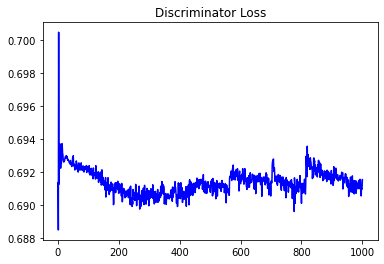

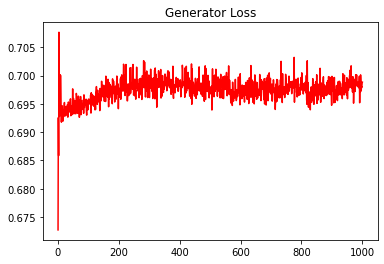

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10518038085945192


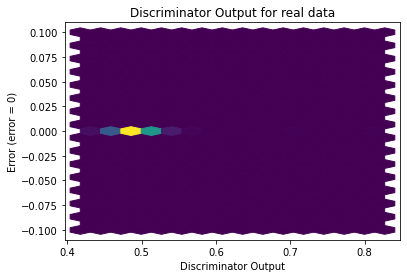

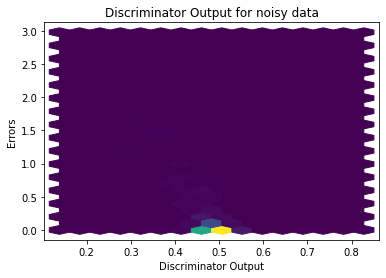

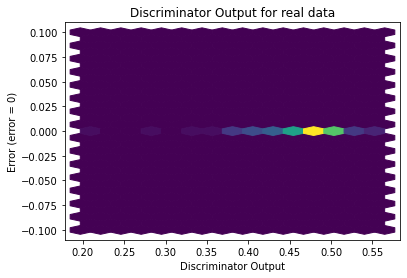

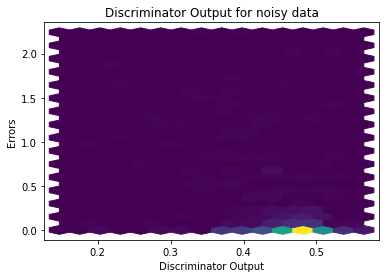

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


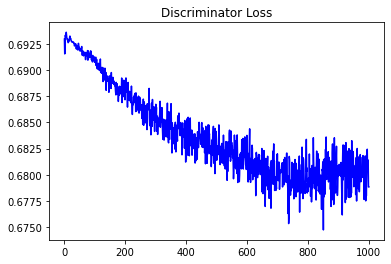

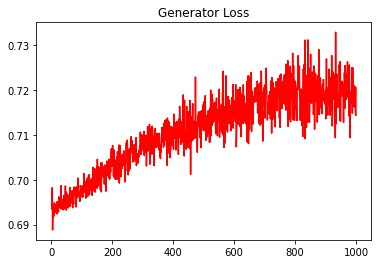

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15516658566142863


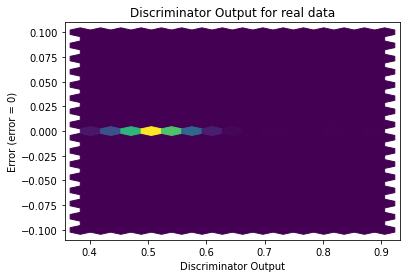

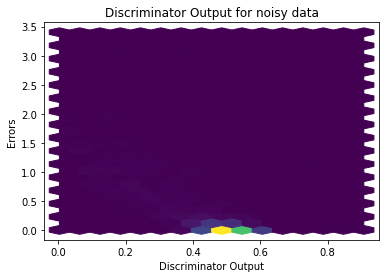

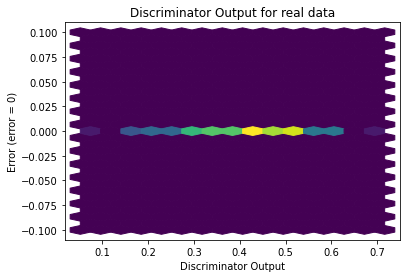

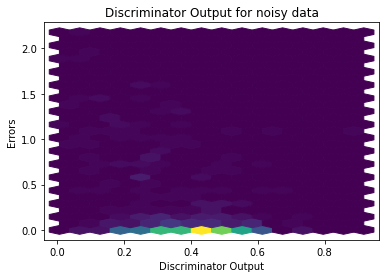

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6073]], requires_grad=True)
